1) Extract reviews of any product from ecommerce website like amazon\
2) Perform emotion mining

In [4]:
#Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Amazon_Reviews_Oneplus_Nord_CE2.csv to Amazon_Reviews_Oneplus_Nord_CE2.csv


In [19]:
reviews=pd.read_csv("Amazon_Reviews_Oneplus_Nord_CE2.csv")
reviews

,Unnamed: 0,Rating,Title,Review,Review_Date
0,0,1.0,Worst phone ever,Hang problem,25 February 2022
1,1,2.0,Ok !!! Not up to the mark,I'm writing this review after using 3days !!!B...,26 February 2022
2,2,5.0,Awesome look,Camera is so good n very fast phone back look ...,25 February 2022
3,3,3.0,One plus losing is originality!!!,The media could not be loaded.\n ...,28 February 2022
4,4,1.0,Read,I got my delivery on 23 feb when I unboxed the...,26 February 2022
...,...,...,...,...,...
4123,4123,1.0,Heating up,Heating up even for moderate use. Heat increas...,21 June 2022
4124,4124,5.0,Over all best,Very Nice,22 June 2022
4125,4125,1.0,Voice cut,All features are good but call cut frequently ...,16 June 2022
4126,4126,4.0,Battery backup is low,As it has fast charging but also drains the ba...,18 June 2022


In [20]:
reviews.drop(['Unnamed: 0','Rating','Title','Review_Date'],inplace=True,axis=1)

In [21]:
reviews

,Review
0,Hang problem
1,I'm writing this review after using 3days !!!B...
2,Camera is so good n very fast phone back look ...
3,The media could not be loaded.\n ...
4,I got my delivery on 23 feb when I unboxed the...
...,...
4123,Heating up even for moderate use. Heat increas...
4124,Very Nice
4125,All features are good but call cut frequently ...
4126,As it has fast charging but also drains the ba...


# **BasicText Preprocessing**

In [27]:
import re #regular expression
import string

def clean_text(text):
    if isinstance(text, str):
        text = text.lower()
        text = re.sub('\[.*?\]', '', text)
        text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
        text = re.sub('\w*\d\w*', '', text)
        text = re.sub("[0-9" "]+", " ", text)
        text = re.sub('[‘’“”…]', '', text)
    else:
        text = ''
    return text

clean = lambda x: clean_text(x)

In [28]:
reviews["Review"] = reviews["Review"].apply(clean) # Clean The Text
reviews.head(11)

,Review
0,hang problem
1,im writing this review after using be to hone...
2,camera is so good n very fast phone back look ...
3,the media could not be loaded\n ...
4,i got my delivery on feb when i unboxed the p...
5,the media could not be loaded\n ...
6,nord ce is a decent choice for someone lookin...
7,phone is over all good but some heating proble...
8,dont buy any phones from amazon i really had a...
9,the media could not be loaded\n ...


# **Word Frequency**

In [29]:
freq = pd.Series(' '.join(reviews['Review']).split()).value_counts()[:20] # for top 20
freq

is         2736
good       1637
the        1581
phone      1559
and        1462
not        1283
this       1067
camera     1054
i           942
to          918
in          909
very        846
battery     798
it          792
for         789
a           726
quality     697
of          625
but         595
one         546
dtype: int64

# **Removing Stopwords**

In [31]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [32]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
reviews['Review'] = reviews['Review'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

# Word Frequency after Removal of Stopwords

In [33]:
freq_stp = pd.Series(' '.join(reviews['Review']).split()).value_counts()[:20] # for top 20
freq_stp

good        1637
phone       1559
camera      1054
battery      798
quality      697
one          546
mobile       499
oneplus      365
nice         344
like         335
product      324
plus         308
charging     306
fast         302
best         296
price        291
also         255
life         248
could        242
buy          236
dtype: int64

# **Basic Feature Extaction**

# **CountVectorizer**

In [35]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
vectorizer = CountVectorizer(min_df = 1, max_df = 0.9)
X = vectorizer.fit_transform(reviews['Review'])
word_freq_df = pd.DataFrame({'term': vectorizer.get_feature_names_out(), 'occurrences':np.asarray(X.sum(axis=0)).ravel().tolist()})
word_freq_df['frequency'] = word_freq_df['occurrences']/np.sum(word_freq_df['occurrences'])
word_freq_df.head(11)

,term,occurrences,frequency
0,aa,6,0.000148
1,aacha,2,0.000049
2,aaj,1,0.000025
3,aap,5,0.000123
4,aapko,1,0.000025
5,aaps,1,0.000025
6,aawaj,1,0.000025
7,aaya,1,0.000025
8,aayega,1,0.000025
9,aayi,2,0.000049


# **TFIDF - Term frequency inverse Document Frequencyt**

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features= 1000, max_df = 0.5, smooth_idf=True) #keep top 1000 words
doc_vec = vectorizer.fit_transform(reviews['Review'])

In [38]:
names_features = vectorizer.get_feature_names_out()
names_features

array(['aa', 'aap', 'ab', 'able', 'absolutely', 'accept', 'accha',
       'according', 'accurate', 'acha', 'actually', 'adapter', 'add',
       'adding', 'affordable', 'ago', 'ai', 'alert', 'alot', 'amazing',
       'amazon', 'amoled', 'android', 'apart', 'app', 'apple',
       'application', 'approx', 'apps', 'ask', 'asked', 'aspect',
       'aspects', 'atleast', 'audio', 'aur', 'auto', 'automatic',
       'automatically', 'available', 'avarage', 'average', 'avg', 'avoid',
       'away', 'awesome', 'awesomecamera', 'baad', 'background', 'backup',
       'bad', 'badbad', 'bahamas', 'bahut', 'bakwas', 'balanced', 'band',
       'bands', 'based', 'basic', 'batery', 'battery', 'battry', 'beast',
       'beautiful', 'bed', 'believe', 'best', 'better', 'bettery', 'bgmi',
       'bhai', 'bhi', 'big', 'biggest', 'bit', 'blast', 'bloatware',
       'blue', 'bluetooth', 'blur', 'body', 'bought', 'box', 'brand',
       'brandi', 'branding', 'brands', 'bright', 'brightness',
       'brilliant', '

In [39]:
dense = doc_vec.todense()
dense

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [40]:
denselist = dense.tolist()

In [41]:
df = pd.DataFrame(denselist, columns = names_features)
df

,aa,aap,ab,able,absolutely,accept,accha,according,accurate,acha,...,इल,इस,और,कर,करत,खर,टर,नह,पर,बह
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4123,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4124,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4126,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# **N-gram**

**Bi-gram**

In [42]:
def get_top_n2_words(reviews, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2), max_features=2000).fit(reviews) #for tri-gram, put ngram_range=(3,3)
    bag_of_words = vec1.transform(reviews)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec1.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [43]:
top2_words = get_top_n2_words(reviews["Review"], n=200) #top 200
top2_df = pd.DataFrame(top2_words)
top2_df.columns = ["Bi-gram", "Freq"]
top2_df.head(11)

,Bi-gram,Freq
0,camera quality,300
1,one plus,279
2,battery life,202
3,media could,178
4,could loaded,178
5,good phone,138
6,battery backup,129
7,quality good,102
8,fast charging,85
9,good camera,83


**Bi-gram plot**

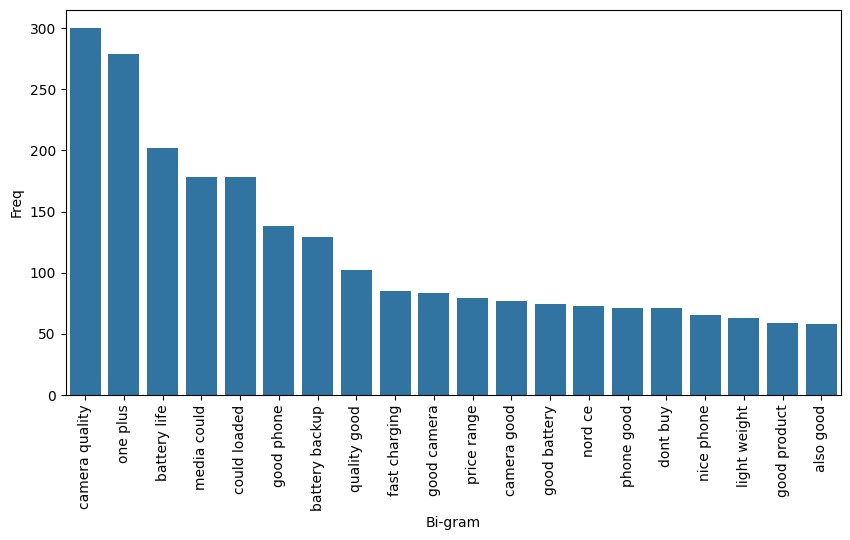

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
top20_bigram = top2_df.iloc[0:20,:]
fig = plt.figure(figsize = (10, 5))
plot = sns.barplot(x=top20_bigram["Bi-gram"],y=top20_bigram["Freq"])
plot.set_xticklabels(rotation=90,labels = top20_bigram["Bi-gram"]);


**Tri-gram**

In [45]:
def get_top_n3_words(reviews, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3), max_features=2000).fit(reviews)
    bag_of_words = vec1.transform(reviews)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [46]:
top3_words = get_top_n3_words(reviews["Review"], n=200)
top3_df = pd.DataFrame(top3_words)
top3_df.columns = ["Tri-gram", "Freq"]
top3_df.head(11)

,Tri-gram,Freq
0,media could loaded,178
1,camera quality good,54
2,battery life good,29
3,one plus nord,28
4,good battery life,27
5,battery backup good,25
6,good camera quality,21
7,oneplus nord ce,20
8,good phone price,18
9,overall good phone,17


**Tri-gram plot**

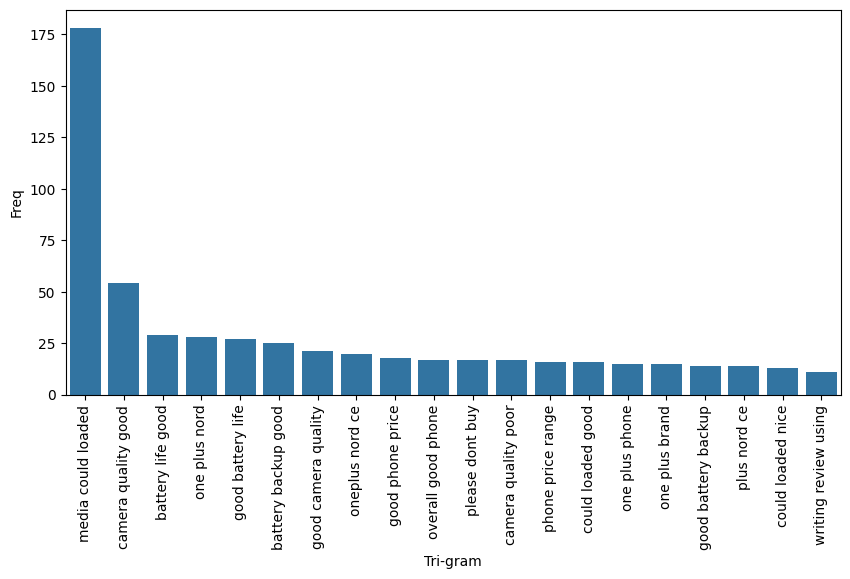

In [47]:
import seaborn as sns
top20_trigram = top3_df.iloc[0:20,:]
fig = plt.figure(figsize = (10, 5))
plot = sns.barplot(x=top20_trigram["Tri-gram"],y=top20_trigram["Freq"])
plot.set_xticklabels(rotation=90,labels = top20_trigram["Tri-gram"]);

# **Creating a Worlcloud **

In [48]:
string_Total = " ".join(reviews["Review"])

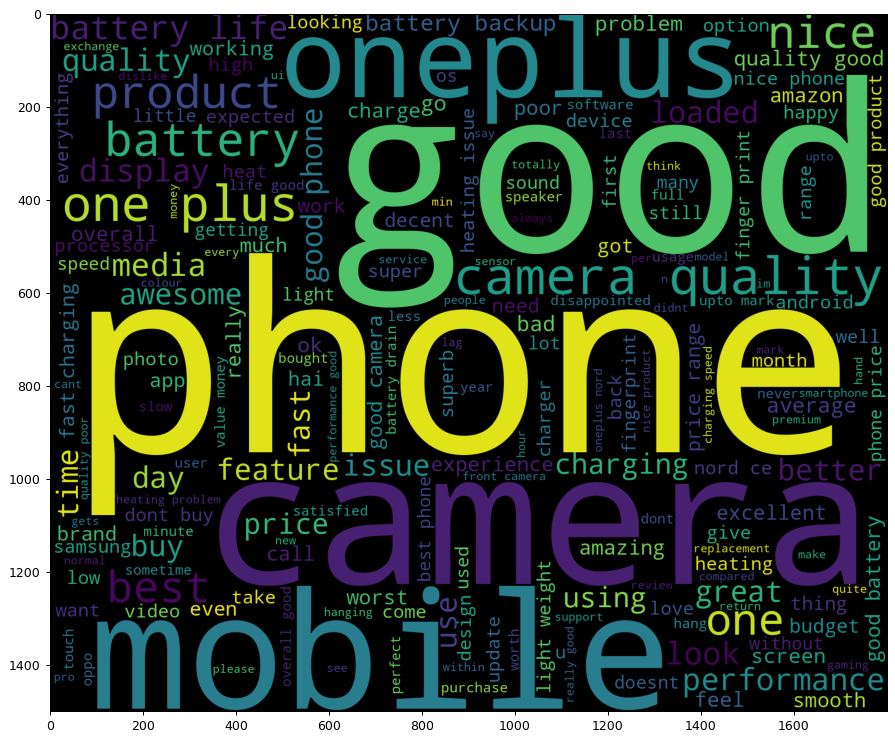

In [49]:
#wordcloud for entire corpus
from wordcloud import WordCloud
plt.figure(figsize=(12,12),dpi=90)
wordcloud_stw = WordCloud(background_color= 'black', width = 1800, height = 1500).generate(string_Total)
plt.imshow(wordcloud_stw);


# **Subjectivity and Polarity**

In [51]:
from textblob import TextBlob

# Get The Subjectivity
def sentiment_analysis(ds):
    sentiment = TextBlob(ds["Review"]).sentiment
    return pd.Series([sentiment.subjectivity, sentiment.polarity])

# Adding Subjectivity & Polarity
reviews[["subjectivity", "polarity"]] = reviews.apply(sentiment_analysis, axis=1)
reviews.head(11)

,Review,subjectivity,polarity
0,hang problem,0.000000,0.000000
1,im writing review using honest normal android ...,0.497333,0.166000
2,camera good n fast phone back look awesomewith...,0.553333,0.398889
3,media could loaded average product decent day ...,0.509524,0.240476
4,got delivery feb unboxed phone display damaged...,0.597565,0.330519
5,media could loaded phone fabbut sometime apps ...,0.622727,0.543939
6,nord ce decent choice someone looking upgrade ...,0.495320,0.251902
7,phone good heating problemand selfie 🤳 goodoth...,0.700000,0.700000
8,dont buy phones amazon really bad exp dislikef...,0.384226,0.072619
9,media could loaded grey mirror finish really c...,0.511111,0.294444


# **Creating a Worlcloud**

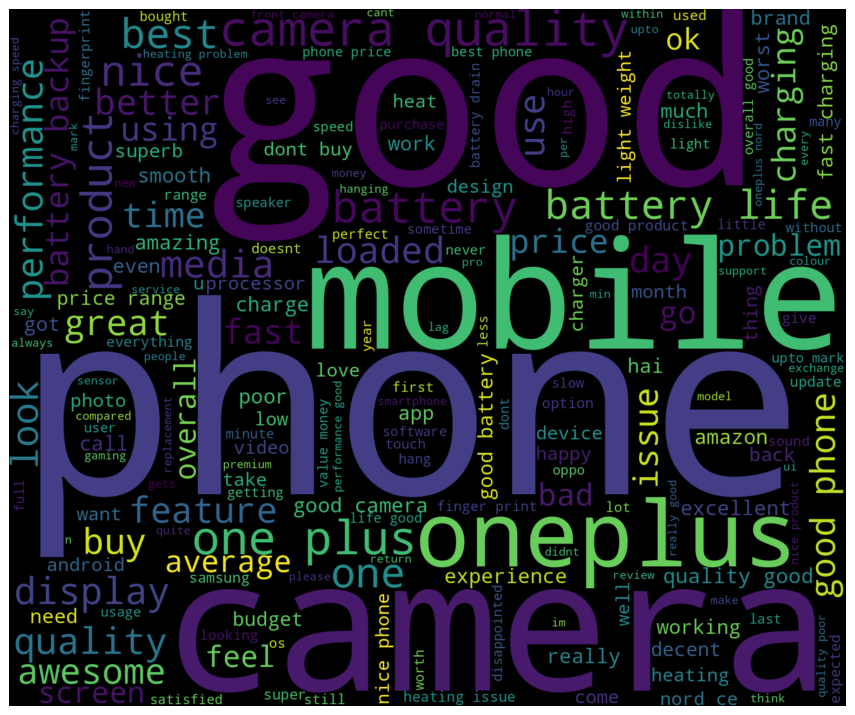

In [52]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

allwords = " ".join([twts for twts in reviews["Review"]])
wordCloud = WordCloud(width = 1800, height = 1500, random_state = 21).generate(allwords)
plt.figure(figsize=(12,12), dpi=90)
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis("off")
plt.show()


In [53]:
# 1 way
def fetch_sentiment_using_SIA(text):
    sid = SentimentIntensityAnalyzer()
    polarity_scores = sid.polarity_scores(text)
    return 'neg' if polarity_scores['neg'] > polarity_scores['pos'] else 'pos'

# 2 way
def fetch_sentiment_using_textblob(text):
    analysis = TextBlob(text)
    return 'pos' if analysis.sentiment.polarity >= 0 else 'neg'

In [56]:
# Compute The Negative, Neutral, Positive Analysis
def analysis(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"

# Create a New Analysis Column
reviews["analysis"] = reviews["polarity"].apply(analysis)

In [58]:
positive_tweets = reviews[reviews['analysis'] == 'Positive']
negative_tweets = reviews[reviews['analysis'] == 'Negative']

print('positive tweets')
for i, row in positive_tweets[:5].iterrows():
    print(' -' + row['Review'])

print('negative tweets')
for i, row in negative_tweets[:5].iterrows():
    print(' -' + row['Review'])

positive tweets
 -im writing review using honest normal android phoneits like onepluscamera quality low says notsound also lowbattery 🔋 backup ok one day normal use itsif ur gamer dont go itoverall price high handsetif u really wanna buy oneplus ho higher end modelim first time buying onepluslittle disappointment
 -camera good n fast phone back look awesomewith dis price segment worth n important thing phone dedicated memory card slot think dis first one plus phone dedicated slot memory cardbattery backup also good n wit help charger u charge ur phone frm minsit super vooc charger frm dat u charge ur phone fastvery smooth touch n fast phone u play games laginternet connectivity also fast n lightning wit jio sim u c hav pasted one photo showing downloading speed wit cellular networki think everyone wants buy dis phone go iti think oneplus launched dis phone lots good features n important thing price lessi recommendjust go itthank u oneplus n amazon dis wonderful product
 -media could lo

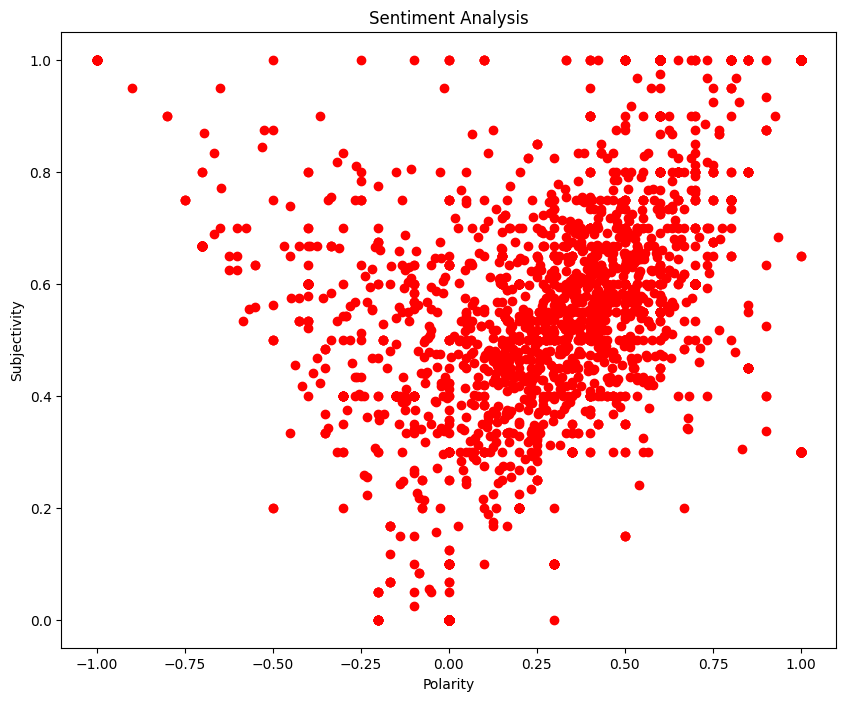

In [59]:
plt.figure(figsize=(10, 8))

for i in range(0, reviews.shape[0]):
    plt.scatter(reviews["polarity"][i], reviews["subjectivity"][i], color = "Red")

plt.title("Sentiment Analysis")
plt.xlabel("Polarity")
plt.ylabel("Subjectivity")
plt.show()

In [60]:
(len(positive_tweets) / len(negative_tweets))*100

550.418410041841